In [10]:
import os 
import numpy as np
import pandas as pd
from PIL import Image
from tqdm import tqdm 
import matplotlib.pyplot as plt
from torchvision import transforms

# Reading `.csv` File

In [11]:
csv_path = "../datasets/Horse2Zebra/preprocessed.csv"
# csv_path = "../datasets/Horse2Zebra/metadata.csv"

df = pd.read_csv(csv_path)
df.drop(columns=["Unnamed: 0"], inplace=True)

df

,image_id,domain,split,image_path,domain_name
0,n02381460_707,A,train,trainA/n02381460_707.jpg,Horse
1,n02381460_7692,A,train,trainA/n02381460_7692.jpg,Horse
2,n02381460_7876,A,train,trainA/n02381460_7876.jpg,Horse
3,n02381460_7651,A,train,trainA/n02381460_7651.jpg,Horse
4,n02381460_908,A,train,trainA/n02381460_908.jpg,Horse
...,...,...,...,...,...
2656,n02391049_5220,B,test,testB/n02391049_5220.jpg,Zebra
2657,n02391049_7190,B,test,testB/n02391049_7190.jpg,Zebra
2658,n02391049_980,B,test,testB/n02391049_980.jpg,Zebra
2659,n02391049_80,B,test,testB/n02391049_80.jpg,Zebra


# Train, Validation, and Test Data Groups

In [12]:
df_dist = df[["image_id", "domain", "split"]].groupby(by=["split", "domain"]).count()

df_dist.reset_index(inplace=True)

df_dist

,split,domain,image_id
0,test,A,120
1,test,B,140
2,train,A,853
3,train,B,1067
4,val,A,214
5,val,B,267


In [13]:
df_dist[ df_dist["split"]=="test" ]["image_id"].values[0]

120

In [14]:
def get_num_images(df, mode, domain):
    return df[ (df["split"]==mode) & (df["domain"]==domain) ]["image_id"].values[0]

train_a = get_num_images(df_dist, "train", "A")
train_b = get_num_images(df_dist, "train", "B")

val_a = get_num_images(df_dist, "val", "A")
val_b = get_num_images(df_dist, "val", "B")

test_a = get_num_images(df_dist, "test", "A")
test_b = get_num_images(df_dist, "test", "B")

<Figure size 1080x864 with 0 Axes>

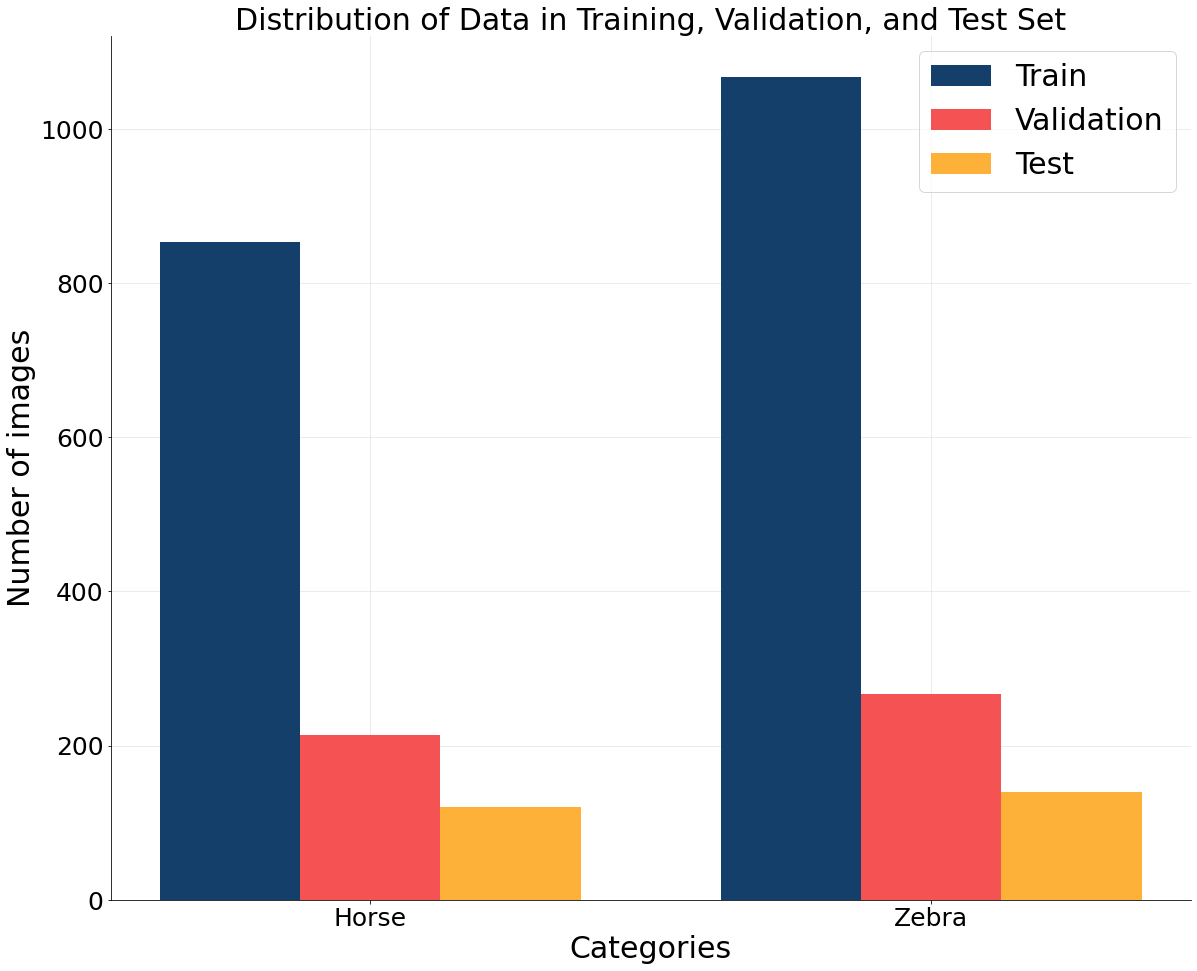

In [24]:
fig_saving_path = "../plots/data_distribution.png"

plt.figure(figsize=(15,12))

fig = plt.figure(figsize=(15, 12))
ax = fig.add_axes([0,0,1,1])

x = np.arange(0,2)

ax.bar(x-0.25, [train_a, train_b], width = 0.25, color="#143F6B", alpha=1, zorder=5, label="Train")
ax.bar(x, [val_a, val_b], width = 0.25, color="#F55353", alpha=1, zorder=5, label="Validation")
ax.bar(x+0.25, [test_a, test_b], width = 0.25, color="#FEB139", alpha=1, zorder=5, label="Test")


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.grid(zorder=0, alpha=0.3)

ax.legend(fontsize=30)

plt.xticks([0, 1], ["Horse", "Zebra"], size=25)
plt.yticks(size=25)

ax.set_ylabel("Number of images", fontsize=30)
ax.set_xlabel("Categories", fontsize=30)

plt.title("Distribution of Data in Training, Validation, and Test Set", fontsize=30)

plt.savefig(fig_saving_path, bbox_inches='tight')

plt.savefig("../plots/horse_2_zebra/train_val_test_distribution1.png", bbox_inches='tight')

plt.show()

<Figure size 1080x864 with 0 Axes>

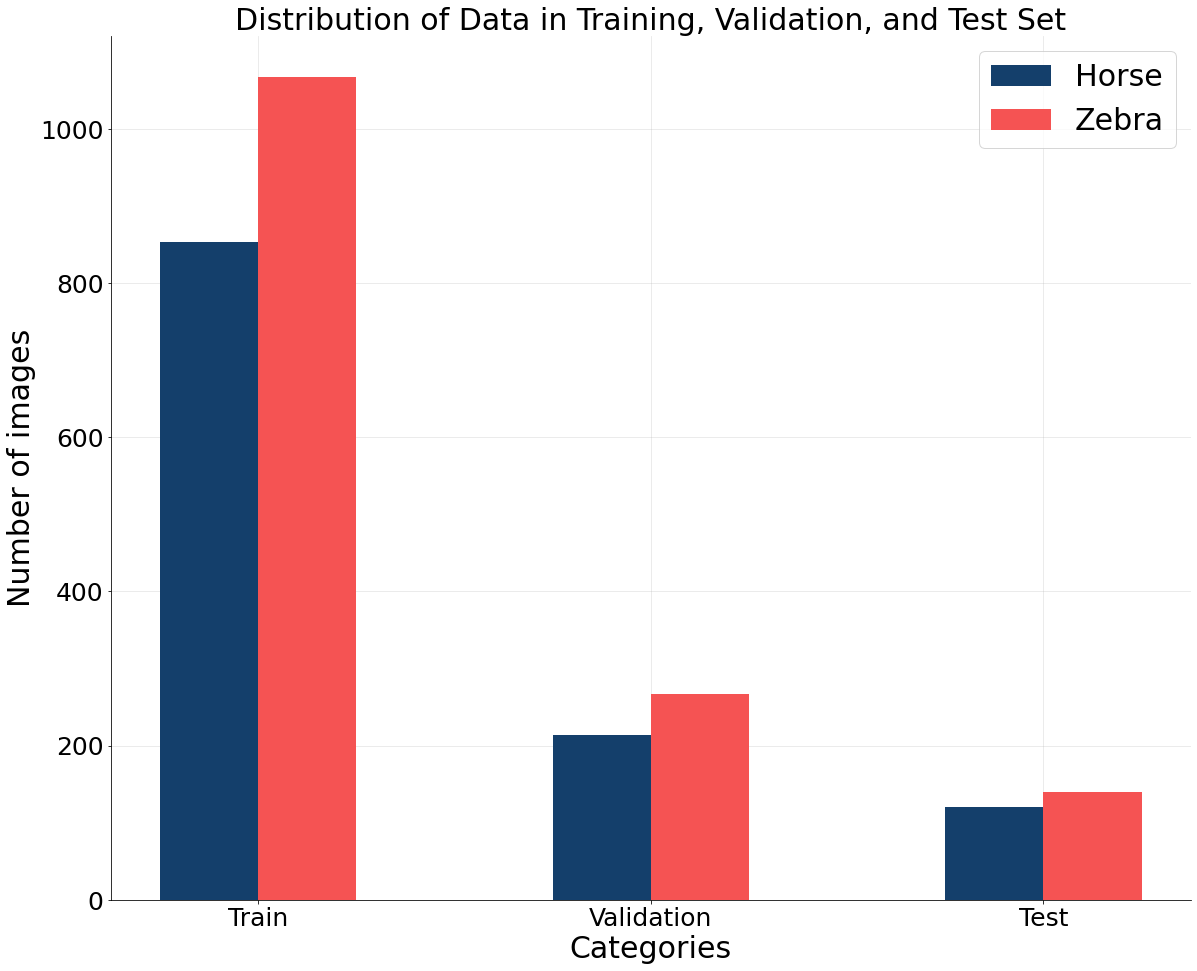

In [25]:
fig_saving_path = "../plots/data_distribution.png"

plt.figure(figsize=(15,12))

fig = plt.figure(figsize=(15, 12))
ax = fig.add_axes([0,0,1,1])

x = np.arange(0,3)

ax.bar(x-0.125, [train_a, val_a, test_a], width = 0.25, color="#143F6B", alpha=1, zorder=5, label="Horse")
ax.bar(x+0.125, [train_b, val_b, test_b], width = 0.25, color="#F55353", alpha=1, zorder=5, label="Zebra")
# ax.bar(x+0.25, [test_a, 0], width = 0.25, color="#FEB139", alpha=1, zorder=5, label="Test")


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.grid(zorder=0, alpha=0.3)

ax.legend(fontsize=30)

plt.xticks([0, 1, 2], ["Train", "Validation", "Test"], size=25)
plt.yticks(size=25)

ax.set_ylabel("Number of images", fontsize=30)
ax.set_xlabel("Categories", fontsize=30)

plt.title("Distribution of Data in Training, Validation, and Test Set", fontsize=30)

plt.savefig(fig_saving_path, bbox_inches='tight')

plt.savefig("../plots/horse_2_zebra/train_val_test_distribution2.png", bbox_inches='tight')

plt.show()

In [26]:
train_a_percent = train_a / (train_a + val_a)
train_b_percent = train_b / (train_b + val_b)

val_a_percent = val_a / (train_a + val_a)
val_b_percent = val_b / (train_b + val_b)

<Figure size 1080x864 with 0 Axes>

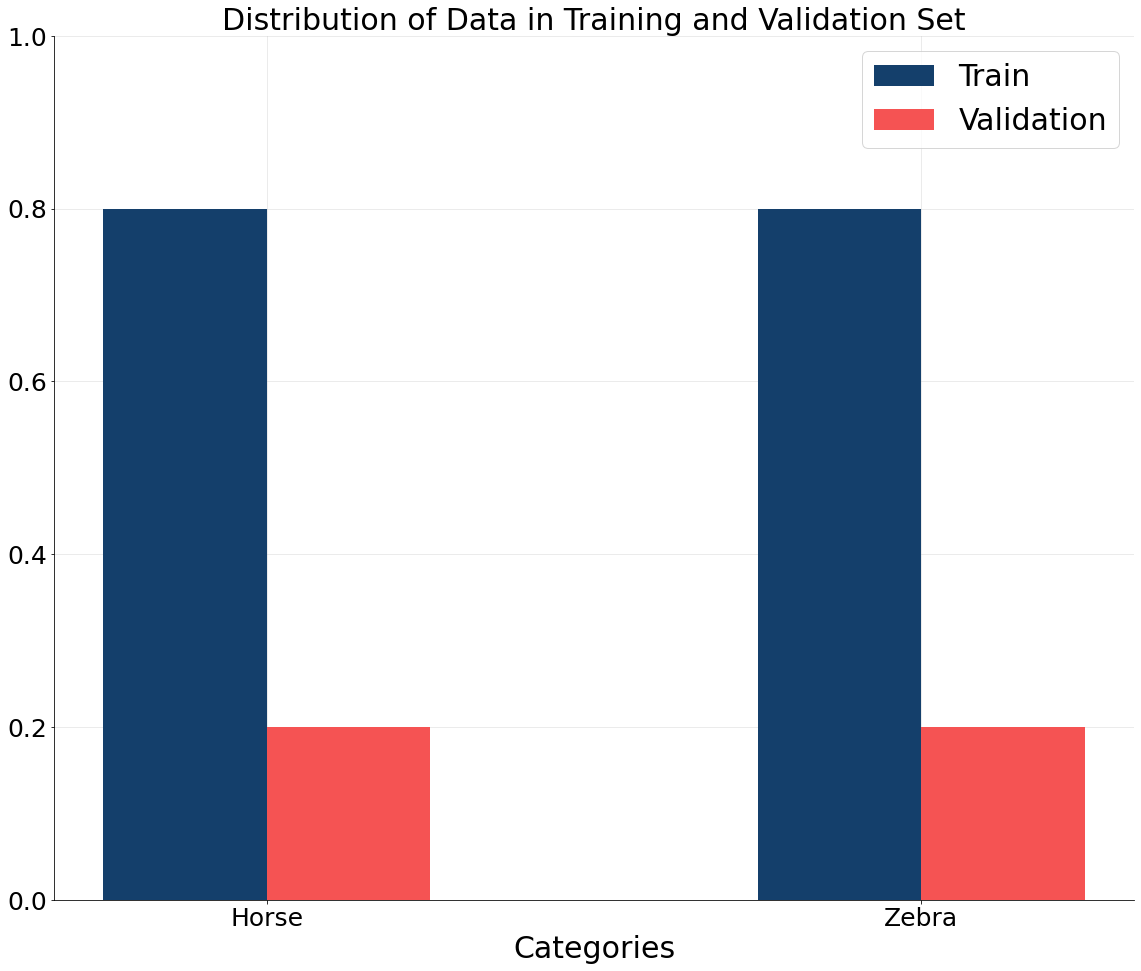

In [27]:
fig_saving_path = "../plots/data_distribution.png"

plt.figure(figsize=(15,12))

fig = plt.figure(figsize=(15, 12))
ax = fig.add_axes([0,0,1,1])

x = np.arange(0,2)

ax.bar(x-0.125, [train_a_percent, train_b_percent], width = 0.25, color="#143F6B", alpha=1, zorder=5, label="Train")
ax.bar(x+0.125, [val_a_percent, val_b_percent], width = 0.25, color="#F55353", alpha=1, zorder=5, label="Validation")
# ax.bar(x+0.25, [test_a, 0], width = 0.25, color="#FEB139", alpha=1, zorder=5, label="Test")


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.grid(zorder=0, alpha=0.3)

ax.legend(fontsize=30)

plt.xticks([0, 1], ["Horse", "Zebra"], size=25)
plt.yticks(size=25)

# ax.set_ylabel("Number of images", fontsize=30)
ax.set_xlabel("Categories", fontsize=30)

plt.title("Distribution of Data in Training and Validation Set", fontsize=30)

plt.savefig(fig_saving_path, bbox_inches='tight')

plt.ylim([0,1])

plt.savefig("../plots/horse_2_zebra/train_val_percent_distribution.png", bbox_inches='tight')

plt.show()

# Train

In [29]:
def hstacked_images(img_base_dir, imgs_path, num_col, saving_path, saving_name, transform=None):
    hstacked = list()
    current_hstacked = None
    hstacked_counter = 0
    
    with tqdm(imgs_path, unit="image") as t_imgs:
        for img in t_imgs:
            img_path = os.path.join(img_base_dir, img)
            if os.path.isfile(img_path):
                image = Image.open(img_path).convert("RGB")
                if len(np.array(image).shape)==2:
                    print(img_path, np.array(image).shape)
                if transform is not None:
                    image = transform(image)

                hstacked_counter += 1

                if current_hstacked is None:
                    current_hstacked = image
                else:
                    current_hstacked = np.hstack( [current_hstacked, image] )

                if hstacked_counter == num_col:

                    hstacked_counter = 0 
                    hstacked.append(current_hstacked)
                    current_hstacked = None
                    
                    
                t_imgs.set_postfix(image=f"{img}")


    vstacked = np.vstack(hstacked)
    output_image = Image.fromarray((vstacked).astype(np.uint8))
    output_image.save(os.path.join(saving_path, f"{saving_name}.png"))

In [149]:
base_dir = "../datasets/Horse2Zebra/"
saving_path, saving_name = "../plots/horse_2_zebra", "train.png"

transform = transforms.Resize((100,100))

df_train = df[ df["split"]=="train" ]

imgs_path = df_train["image_path"].tolist()


hstacked_images(base_dir, 
                imgs_path, 
                num_col=50, 
                saving_path=saving_path, 
                saving_name=saving_name,
                transform=transform
               )

100%|██████████| 1921/1921 [00:07<00:00, 257.72image/s, image=trainB/n02391049_9987.jpg]


# Validation

In [152]:
base_dir = "../datasets/Horse2Zebra/"
saving_path, saving_name = "../plots/horse_2_zebra", "val.png"

transform = transforms.Resize((100,100))

df_val = df[ df["split"]=="val" ]

imgs_path = df_val["image_path"].tolist()


hstacked_images(base_dir, 
                imgs_path, 
                num_col=25, 
                saving_path=saving_path, 
                saving_name=saving_name,
                transform=transform
               )

100%|██████████| 480/480 [00:01<00:00, 242.45image/s, image=trainB/n02391049_35.jpg]  


# Test

In [30]:
base_dir = "../datasets/Horse2Zebra/"
saving_path, saving_name = "../plots/horse_2_zebra", "test.png"

transform = transforms.Resize((100,100))

df_test = df[ df["split"]=="test" ]

imgs_path = df_test["image_path"].tolist()


hstacked_images(base_dir, 
                imgs_path, 
                num_col=20, 
                saving_path=saving_path, 
                saving_name=saving_name,
                transform=transform
               )

100%|██████████| 260/260 [00:00<00:00, 311.75image/s, image=testB/n02391049_200.jpg]  
